In [1]:
import os
import numpy as np
import pandas as pd
import scipy.io as sio

# Drive Cycles

In [172]:
panasonic = "..//data//Panasonic//Panasonic 18650PF Data"
panasonic_dir = panasonic + "//0degC" + "//Drive cycles"
all_temperatures = ["0degC", "-10degC", "-20degC", "10degC", "25degC"]

# dropped files are just concats of previous measurements
dropped = [
    '06-01-17_10.36 0degC_LA92_NN_Pan18650PF.mat',
    '03-27-17_09.06 10degC_US06_HWFET_UDDS_LA92_NN_Pan18650PF.mat',
    '06-07-17_08.39 n10degC_US06_HWFET_UDDS_LA92_Pan18650PF.mat',
    '06-23-17_23.35 n20degC_HWFET_UDDS_LA92_NN_Pan18650PF.mat',
]

panasonic_files = [panasonic_dir + "//" + f for f in os.listdir(panasonic_dir) if f not in dropped]
os.listdir(panasonic_dir)

['05-30-17_12.56 0degC_Cycle_1_Pan18650PF.mat',
 '05-30-17_20.16 0degC_Cycle_2_Pan18650PF.mat',
 '06-01-17_10.36 0degC_LA92_NN_Pan18650PF.mat',
 '06-01-17_10.36 0degC_LA92_Pan18650PF.mat',
 '06-01-17_10.36 0degC_NN_Pan18650PF.mat',
 '06-01-17_15.36 0degC_Cycle_3_Pan18650PF.mat',
 '06-01-17_22.03 0degC_Cycle_4_Pan18650PF.mat',
 '06-02-17_04.58 0degC_US06_Pan18650PF.mat',
 '06-02-17_10.43 0degC_HWFET_Pan18650PF.mat',
 '06-02-17_17.14 0degC_UDDS_Pan18650PF.mat']

In [173]:
def read_mat_file(file):
    df = pd.DataFrame()
    columns = ['TimeStamp', 'Voltage', 'Current', 'Ah', 'Wh', 'Power', 'Battery_Temp_degC', 'Time', 'Chamber_Temp_degC']
    for col in columns:
       df[col] = pd.Series(file['meas'][0][0][col].flatten())
    return df

In [174]:
# example
file = sio.loadmat(panasonic_files[0])
df_file = read_mat_file(file)
df_file

,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC
0,[5/30/2017 12:56:00 PM],4.13620,-1.79738,-0.00000,-0.00000,-7.434323,0.335766,0.000000,NaN
1,[5/30/2017 12:56:00 PM],4.06607,-1.83413,-0.00005,-0.00022,-7.457701,0.335766,0.100995,NaN
2,[5/30/2017 12:56:00 PM],4.01782,-1.86516,-0.00010,-0.00043,-7.493877,0.335766,0.201990,NaN
3,[5/30/2017 12:56:00 PM],3.98372,-1.88884,-0.00016,-0.00064,-7.524610,0.335766,0.303992,NaN
4,[5/30/2017 12:56:00 PM],3.95863,-1.90599,-0.00021,-0.00085,-7.545109,0.335766,0.400994,NaN
...,...,...,...,...,...,...,...,...,...
88002,[5/30/2017 3:22:55 PM],3.11595,0.00000,-2.61000,-8.75192,0.000000,1.399872,8815.279997,NaN
88003,[5/30/2017 3:22:56 PM],3.11595,0.00000,-2.61000,-8.75192,0.000000,1.399872,8815.387993,NaN
88004,[5/30/2017 3:22:56 PM],3.11595,0.00000,-2.61000,-8.75192,0.000000,1.399872,8815.480991,NaN
88005,[5/30/2017 3:22:56 PM],3.11595,0.00000,-2.61000,-8.75192,0.000000,1.184792,8815.586996,NaN


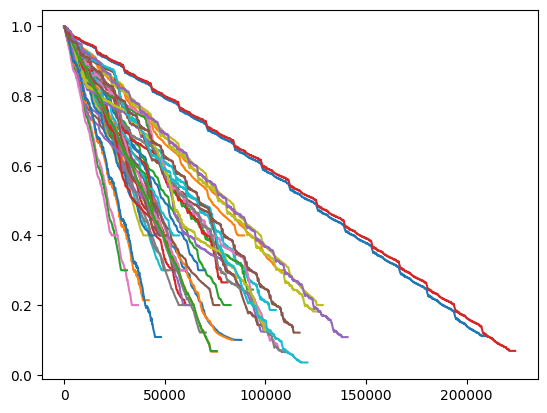

In [178]:
# Concat all drive cycle data
df_drive_cycle_list = []
for temp in all_temperatures:
    panasonic_dir = panasonic + f"//{temp}" + "//Drive cycles"
    panasonic_files = [panasonic_dir + "//" + f for f in os.listdir(panasonic_dir) if f not in dropped]
    for file in panasonic_files:
        df_file = read_mat_file(sio.loadmat(file))
        
        # calculate SoC given a Panasonic 18650PF cell with a maximum capacity of 2.9Ah
        # Assumption: All test were started at an initial 100% SoC
        df_file["SoC"] = (2.9 + df_file['Ah'])/2.9
        
        df_drive_cycle_list += [df_file]
        df_file['SoC'].plot()

In [180]:
df_drive_cycle = pd.concat(df_drive_cycle_list)
df_drive_cycle

,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC,SoC
0,[5/30/2017 12:56:00 PM],4.13620,-1.79738,-0.00000,-0.00000,-7.434323,0.335766,0.000000,NaN,1.000000
1,[5/30/2017 12:56:00 PM],4.06607,-1.83413,-0.00005,-0.00022,-7.457701,0.335766,0.100995,NaN,0.999983
2,[5/30/2017 12:56:00 PM],4.01782,-1.86516,-0.00010,-0.00043,-7.493877,0.335766,0.201990,NaN,0.999966
3,[5/30/2017 12:56:00 PM],3.98372,-1.88884,-0.00016,-0.00064,-7.524610,0.335766,0.303992,NaN,0.999945
4,[5/30/2017 12:56:00 PM],3.95863,-1.90599,-0.00021,-0.00085,-7.545109,0.335766,0.400994,NaN,0.999928
...,...,...,...,...,...,...,...,...,...,...
116977,[3/21/2017 7:42:46 PM],3.35336,0.00000,-2.54962,-8.63844,0.000000,27.480050,11732.930999,25.0,0.120821
116978,[3/21/2017 7:42:46 PM],3.35336,0.00000,-2.54962,-8.63844,0.000000,27.480050,11733.030003,25.0,0.120821
116979,[3/21/2017 7:42:46 PM],3.35336,0.00000,-2.54962,-8.63844,0.000000,27.480050,11733.128996,25.0,0.120821
116980,[3/21/2017 7:42:46 PM],3.35272,0.00000,-2.54962,-8.63844,0.000000,27.267100,11733.228000,25.0,0.120821


# Charges and Pauses

In [200]:
panasonic = "..//data//Panasonic//Panasonic 18650PF Data"
panasonic_dir = panasonic + "//0degC" + "//Charges and Pauses"
all_temperatures = ["0degC", "-10degC", "-20degC", "10degC", "25degC"]

dropped = [
    '05-26-17_10.24 3623_Charge2a.mat',  # failed charge
]

panasonic_files = [panasonic_dir + "//" + f for f in os.listdir(panasonic_dir)]
os.listdir(panasonic_dir)

['05-20-17_08.43 3619_PreChg.mat',
 '05-20-17_10.44 3619_DisPulse.mat',
 '05-20-17_12.07 3619_dis5_10p.mat',
 '05-21-17_09.52 3619_Charge2a.mat',
 '05-22-17_13.48 3623_dis5_10p.mat',
 '05-26-17_10.24 3623_Charge2a.mat',
 '05-30-17_07.44 3659_Charge2a.mat',
 '05-30-17_15.23 3659_Charge1.mat',
 '06-01-17_10.37 3686_Charge2.mat',
 '06-01-17_13.37 3686_Pause3.mat',
 '06-01-17_17.21 3686_Charge3.mat',
 '06-01-17_20.04 3686_Pause4.mat',
 '06-02-17_00.13 3686_Charge4.mat',
 '06-02-17_02.59 3686_Pause5.mat',
 '06-02-17_06.00 3686_Charge5.mat',
 '06-02-17_08.44 3686_Pause6.mat',
 '06-02-17_12.24 3686_Charge6.mat',
 '06-02-17_15.15 3686_Pause7.mat',
 '06-02-17_20.49 3686_Charge7.mat']

In [205]:
# example
file = sio.loadmat(panasonic_files[-1])
df_file = read_mat_file(file)
df_file

,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC
0,[4/29/2017 1:07:27 PM],2.98792,0.0,0.00000,NaN,0.0,26.46011,0.000000,0
1,[4/29/2017 1:08:27 PM],3.02781,0.0,0.00000,NaN,0.0,26.47131,59.992000,0
2,[4/29/2017 1:09:27 PM],3.04453,0.0,0.00000,NaN,0.0,26.25836,120.003000,0
3,[4/29/2017 1:10:27 PM],3.05354,0.0,0.00000,NaN,0.0,26.04540,179.999999,0
4,[4/29/2017 1:11:27 PM],3.05805,0.0,0.00000,NaN,0.0,26.04540,239.995007,0
...,...,...,...,...,...,...,...,...,...
118,[4/29/2017 3:03:38 PM],4.18849,0.0,2.74855,NaN,0.0,25.64191,6971.036007,0
119,[4/29/2017 3:04:38 PM],4.18784,0.0,2.74855,NaN,0.0,25.64191,7031.036999,0
120,[4/29/2017 3:04:38 PM],4.18784,0.0,2.74855,NaN,0.0,25.64191,7031.036999,0
121,[4/29/2017 3:04:44 PM],4.18784,0.0,2.74855,NaN,0.0,25.63070,7036.051999,0


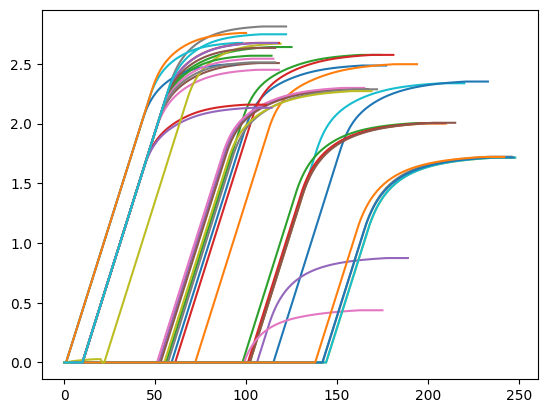

In [206]:
for temp in all_temperatures:
    panasonic_dir = panasonic + f"//{temp}" + "//Charges and Pauses"
    panasonic_files = [panasonic_dir + "//" + f for f in os.listdir(panasonic_dir) if "Charge" in f and f not in dropped]
    for file in panasonic_files:
        df_file = read_mat_file(sio.loadmat(file))
        df_file['Ah'].plot()

In [209]:
# Looks like all charges were done up to 100% SoC. Which (kind of) confirms the previous assumption. 

In [210]:
# Pauses are just flat lines

# 5 Pulse Test

In [217]:
panasonic = "..//data//Panasonic//Panasonic 18650PF Data"
panasonic_dir = panasonic + "//0degC" + "//5 pulse test"
all_temperatures = ["0degC", "-10degC", "-20degC", "10degC", "25degC"]

dropped = []

panasonic_files = [panasonic_dir + "//" + f for f in os.listdir(panasonic_dir)]
os.listdir(panasonic_dir)

['05-20-17_10.44 0degC_5pulse_HPPC_Pan18650PF.mat',
 '05-20-17_12.07 3619_dis5_10p.mat']

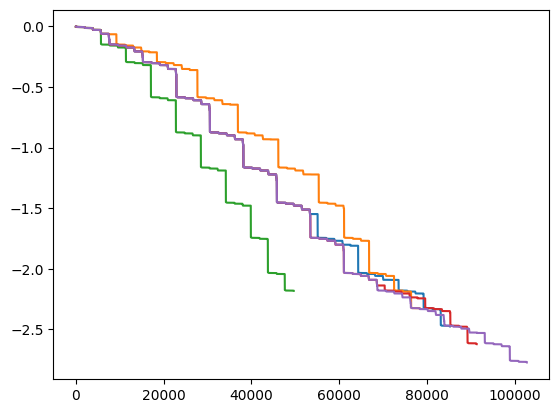

In [220]:
for temp in all_temperatures:
    panasonic_dir = panasonic + f"//{temp}" + "//5 pulse test"
    panasonic_files = [panasonic_dir + "//" + f for f in os.listdir(panasonic_dir) if "5Pulse_HPPC" in f]
    for file in panasonic_files:
        df_file = read_mat_file(sio.loadmat(file))
        df_file['Ah'].plot()